# Part 1 - Indexing And Querying

* Use Chroma (default SQLite) as a vectorDB
* LangChain PyPDFLoader
* Amazon Titan Embedding to convert text to numbers
* Chunk Size 600, overlap 100

## Indexer Logic



<div>
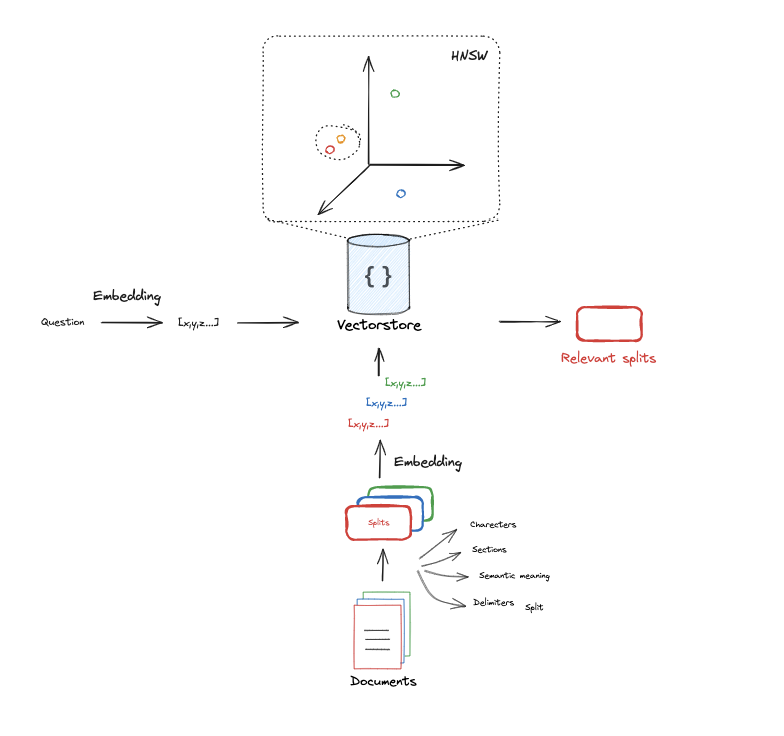
</div>

<a name="cite_note-1"></a>image: https://github.com/langchain-ai/rag-from-scratch/blob/main/rag_from_scratch_1_to_4.ipynb

In [5]:
import glob
import boto3

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.embeddings import BedrockEmbeddings
from langchain_community.vectorstores import Chroma


def process_document(doc):
    loader = PyPDFLoader(doc)
    docs = None
    try:
        docs = loader.load()
    except Exception as err:
        print(err)
        return

    session = boto3.Session(profile_name='tap_dev')

    # Create a bedrock runtime client in us-west-2
    bedrock_rt = session.client("bedrock-runtime",
                                region_name="us-east-1"
                                )

    embedding_model_id = "amazon.titan-embed-text-v2:0"
    embeddings = BedrockEmbeddings(client=bedrock_rt, model_id=embedding_model_id)

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=600,
        chunk_overlap=100,
        separators=["\n\n", "\n", ".", "?", "!", " ", ""],
    )

    try:
        docs_splits = text_splitter.split_documents(docs)
    except Exception as e:
        print(e)
        return

    client = Chroma(collection_name="rag_app",
              persist_directory='./brew-rag-bedrock1/',
              embedding_function=embeddings,
              collection_metadata={"hnsw:space": "cosine"})
    
    vector_store = client.add_documents(documents=docs_splits,
                                    embedding=embeddings,
                                    persist_directory='./brew-rag-bedrock1/',
                                    collection_name="rag_app",
    )

    print("Completed!")



if __name__ == '__main__':

    for pdf_file in list(glob.glob('docs/bitcoin.pdf')):
        print(f"processing file {pdf_file}")
        process_document(pdf_file)



processing file docs/bitcoin.pdf


/var/folders/_8/t63bksc944vf94___2v9xp9r0000gn/T/ipykernel_51656/1657119522.py:41: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  client = Chroma(collection_name="rag_app",


Completed!


## Retriever logic


<div>
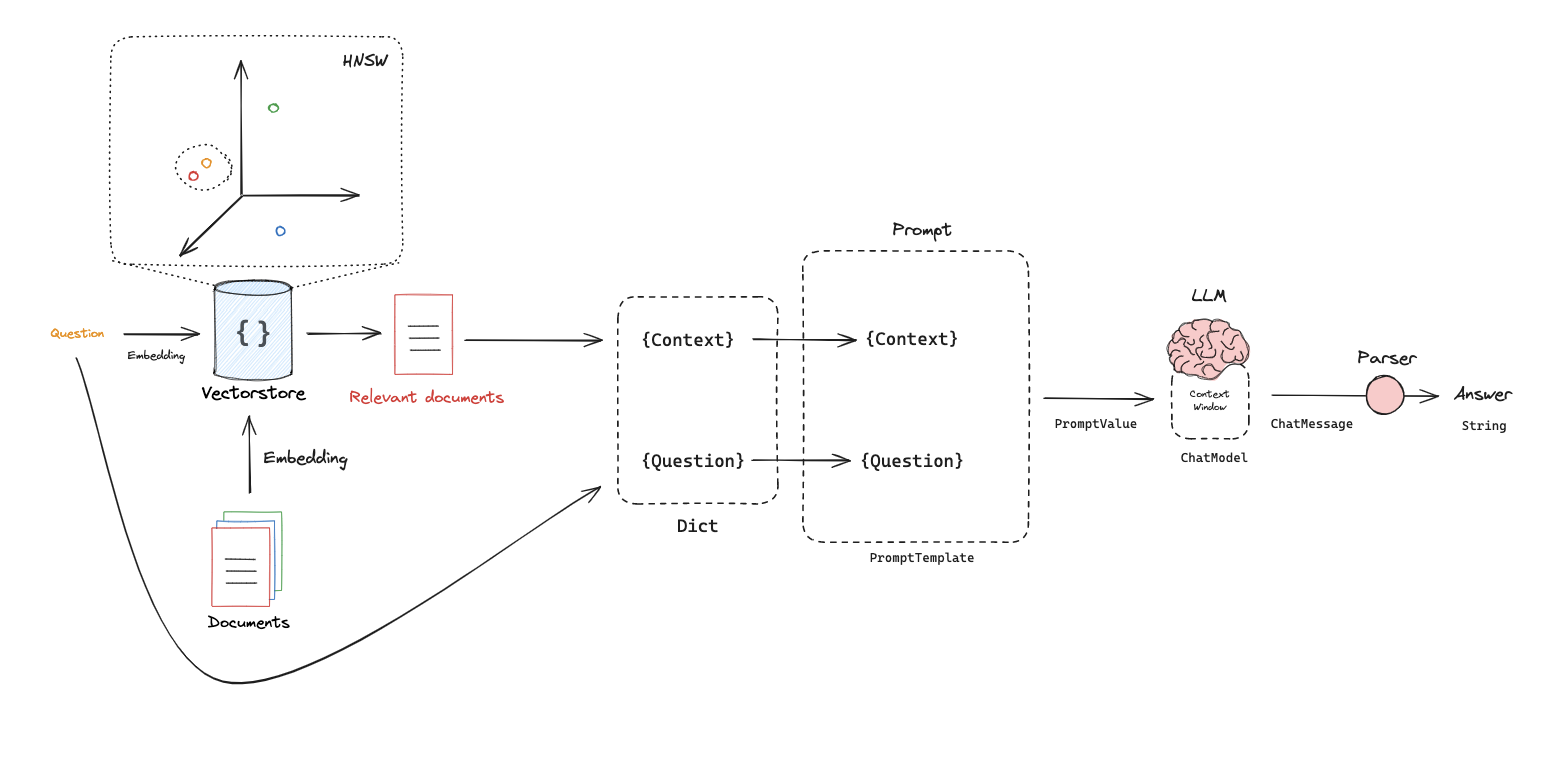
</div>


<a name="cite_note-1"></a>image: https://github.com/langchain-ai/rag-from-scratch/blob/main/rag_from_scratch_1_to_4.ipynb

In [6]:
import boto3
import chromadb
from charset_normalizer.cli import query_yes_no
from chromadb.utils.embedding_functions.amazon_bedrock_embedding_function import AmazonBedrockEmbeddingFunction
from langchain_chroma import Chroma
from langchain_community.embeddings import BedrockEmbeddings

from IPython.display import display, Markdown

def similarity_search(query):

    session = boto3.Session(profile_name='tap_dev')

    # Create a bedrock runtime client in us-east-1
    bedrock_rt = session.client("bedrock-runtime",
                                region_name="us-east-1"
                                )

    embedding_model_id = "amazon.titan-embed-text-v2:0"
    embeddings = BedrockEmbeddings(client=bedrock_rt, model_id=embedding_model_id)

    chroma_client = chromadb.PersistentClient(path="./brew-rag-bedrock")
    
    collection = chroma_client.get_or_create_collection(
                    name="rag_app",
                    embedding_function=AmazonBedrockEmbeddingFunction(
                    model_name=embedding_model_id,
                    session=session
                ),
                metadata={"hnsw:space": "cosine"})

    results = collection.query(query_texts=[query], n_results=10)
    context = results.get("documents")[0]
    
    for idx, docs in enumerate(context):
        display(Markdown(f"### {idx}\n\n{docs}"))


if __name__ == '__main__':

    query = "How does the Bitcoin work?"
    similarity_search(query)


### 0

humans that had caused the tumult and embraced a new paradigm, in which both the 
ruleset of an economy and its execution are provided by software rather than people. 
Bitcoin sought to do two things: make the rules governing money entirely predictable 
and transparent and give people the ability to transfer it over the Internet without the 
need for corporate surrogates.  
Within this technology, however, lie the seeds of something much bigger. The nucleus 
of Bitcoin’s architecture, a structure called a “blockchain,” is now the basis of proposed

### 1

10 
Sutardja Center for Entrepreneurship & Technology Technical Report 
 
Bitcoin solves this problem by introducing a mathematical puzzle: each block will be 
accepted in the blockchain provided it contains an answer to a very special mathematical 
problem. This is also known as “proof of work”—node generating a block needs to prove that 
it has put enough computing resources to solve a mathematical puzzle. For instance, a node 
can be required to find a “nonce” which when hashed with transactions and hash of previous

### 2

9 
Sutardja Center for Entrepreneurship & Technology Technical Report 
 
 
Figure 4. Generation of  Blockchain from unordered transactions. 
The Bitcoin solved this problem by a mechanism that is now popularly known as 
Blockchain technology​. The Bitcoin system orders transactions by placing them in groups 
called blocks and then linking these blocks through what is called Blockchain.  The 
transactions in one block are considered to have happened at the same time.  These blocks 
are linked to each-other (like a chain) in a proper linear, chronological order with every

### 3

• January 9 Bitcoin v0.1 released and announced on the cryptography mailing list 
• January 12 First Bitcoin transaction, in block 170 from Satoshi to Hal Finney 
 
The popularity of the Bitcoin has never ceased to increase since then. The underlying 
BlockChain  technology is now finding new range of applications beyond finance. 
 
2.Blockchain Technology: How does it work? 
 We explain the concept of the blockchain by explaining how Bitcoin works since it is 
intrinsically linked to the Bitcoin. However, the blockchain technology is applicable to  any

### 4

to validate, safeguard and preserve transactions. A certain percentage of fraud is unavoidable 
in online transactions and that needs mediation by financial transactions. This results in high 
transaction costs.  
Bitcoin uses cryptographic proof instead of the trust in the third party for two willing parties 
to execute an online transaction over the Internet.  Each transaction is protected through a 
digital signature. Each transaction is sent to the “public key” of the receiver digitally signed 
using the “private key” of the sender. In order to spend money, owner of the cryptocurrency

### 5

22 
Sutardja Center for Entrepreneurship & Technology Technical Report 
 
 
 
 
Section VI: Conclusions 
 
To conclude, Blockchain is the technology backbone of Bitcoin.  The distributed 
ledger functionality coupled with security of BlockChain, makes it very attractive 
technology to solve the current Financial as well as non-financial business problems.  
 
As far as the technology is concerned, the cryptocurrency based tech is either in the 
downward slope of inflated expectations or in trough of disillusionment as shown in 
Figure 8 below.

### 6

of Bitcoin’s architecture, a structure called a “blockchain,” is now the basis of proposed 
applications in nearly every sector. Like Bitcoin, these applications are being designed 
to remove rent-seeking corporations from digital processes while giving users more 
control over their data. 
Blockchains borrow from research into distributed systems, cryptography, computer 
security, and game theory, to deliver a new type of shared database. A blockchain-
driven database is replicated on multiple computers across many jurisdictions. Additions

### 7

complicated and hence the blockchain quickly stabilizes, meaning that every node is in 
3 http://www.imponderablethings.com/2013/07/how-bitcoin-works-under-hood.html 
10

### 8

some history and the technology itself​. 
 
Section I: BlockChain Technology  
 
1.Short History of Bitcoin 
 
4

### 9

Bitcoin: A Peer-to-Peer Electronic Cash System
Satoshi Nakamoto
satoshin@gmx.com
www.bitcoin.org
Abstract.  A purely peer-to-peer version of  electronic cash would allow online  
payments to be sent directly from one party to another without going through a  
financial institution.  Digital signatures provide part of the solution, but the main  
benefits are lost if a trusted third party is still required to prevent double-spending.  
We propose a solution to the double-spending problem using a peer-to-peer network.